In [2]:
%pip install seaborn
import pandas as pd  # Para manipulación de datos
import numpy as np   # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización de datos
%matplotlib inline 
import seaborn as sns  # Para visualización avanzada de datos
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

ERROR: Could not install packages due to an OSError: [WinError 32] El proceso no tiene acceso al archivo porque está siendo utilizado por otro proceso: 'C:\\sw\\mongodb_python\\mongodb-env\\Lib\\site-packages\\matplotlib\\backends\\qt_editor\\figureoptions.py'
Check the permissions.



  Using cached matplotlib-3.9.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB 

ImportError: DLL load failed while importing _c_internal_utils: No se puede encontrar el módulo especificado.

Cargamos los datos en objetos DataFrame

In [3]:
df18 = pd.read_csv('INTERVENCIONES_2018.csv')
df19 = pd.read_csv('INTERVENCIONES_2019.csv')
df20 = pd.read_csv('INTERVENCIONES_2020.csv')
df21 = pd.read_csv('INTERVENCIONES_2021.csv')
df22 = pd.read_csv('INTERVENCIONES_2022.csv')
df23 = pd.read_csv('INTERVENCIONES_2023.csv')

Concatenamos todos los dataframes para tener un solo dataframe con datos unificados

In [4]:
df_total = pd.concat([df18, df19, df20, df21, df22, df23])

Me quedo con las columnas que me interesan

In [5]:
df_total = df_total[['AÑO','MES','TOTAL']] 

Filtro por nombre para quedarme con los resultados del mes de enero de cada año

In [6]:
df_total = df_total[(df_total['MES'] == 'Enero')| (df_total['MES'] == 'enero')]

Elimino la columna del mes

In [7]:
df_total = df_total.drop(columns='MES')

Importante!! al hacer un group by transformamos el Data Frame en un objeto Serie
Aqui estamos sumando la columna TOTAL de cada año porque el DataFrame original desglosa la actividad por distritos, por lo que habia varios registros con el mismo año pero diferente total

In [8]:
objeto_serie = df_total.groupby('AÑO')['TOTAL'].sum()

Convertimos el objeto serie en Data Frame de nuevo

In [9]:
# Convertir la Serie a DataFrame y resetear el índice
df = objeto_serie.reset_index()

# Renombrar las columnas
df.columns = ['AÑO', 'TOTAL']

Indicamos los valores de X e Y para entrenar el modelo (hay que usar el metodo .values.reshape(-1,1) porque solo tenemos una columna de features)

In [10]:
X = df['AÑO'].values.reshape(-1, 1) 
Y = df['TOTAL']

Creamos el modelo de regresion lineal y lo entrenamos con los valores X e Y

In [15]:
# Crear un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, Y)

LinearRegression()

Predicción para 2024: 540.0999997854233


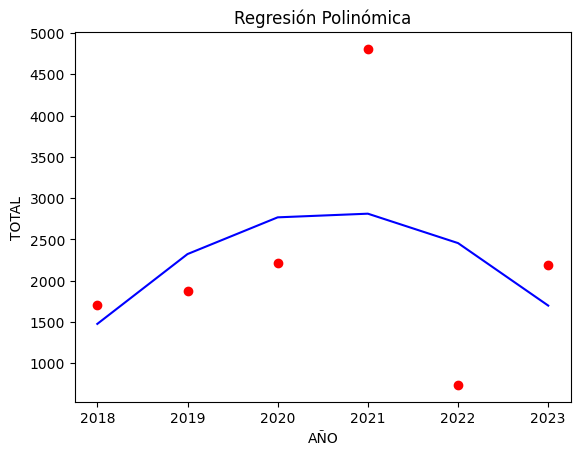

In [13]:
# Transformar las características a polinómicas (grado 2 en este caso)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Crear y entrenar el modelo de regresión lineal con las características polinómicas
modelo = LinearRegression()
modelo.fit(X_poly, Y)

# Predecir el TOTAL para el año 2024
X_pred = np.array([2024]).reshape(-1, 1)
X_pred_poly = poly.transform(X_pred)
prediccion = modelo.predict(X_pred_poly)
print(f"Predicción para 2024: {prediccion[0]}")

# Visualización de los resultados
plt.scatter(X, Y, color='red')
plt.plot(X, modelo.predict(X_poly), color='blue')
plt.title('Regresión Polinómica')
plt.xlabel('AÑO')
plt.ylabel('TOTAL')
plt.show()

In [16]:
# Hacer una predicción para el año 2024
prediccion = modelo.predict([[2024]])

print("Predicción para 2024:", prediccion[0])

Predicción para 2024: 2409.9333333333198


Introducimos los valores obtenidos en un dataframe para mostralo graficamente

In [17]:
df = pd.DataFrame({
    'AÑO': [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    'TOTAL': [1711.0, 1874.0, 2215.0, 4807.0, 737.0, 2185.0, 2410]
})
X_regresion = df['AÑO']
Y_regresion = df['TOTAL']

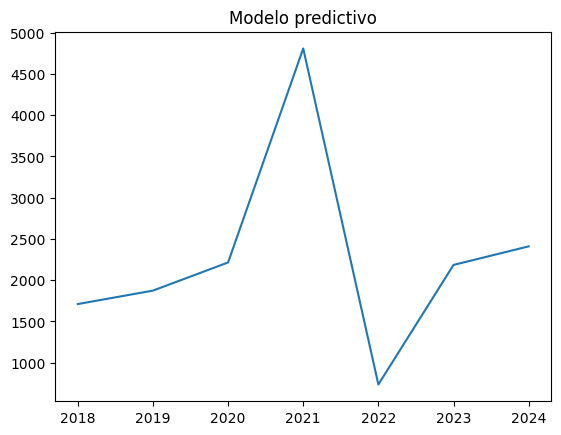

In [18]:
plt.title('Modelo predictivo')
plt.plot(X_regresion,Y_regresion)

A continuacion vamos a comparar el modelo predictivo con los datos reales, importamos los datos de 2024
Hacemos las mismas transformaciones que con los datos de años anteriores

In [19]:
df24 = pd.read_csv('INTERVENCIONES_2024.csv')
df24 = df24[['AÑO','MES','TOTAL']] 
df24 = df24[(df24['MES'] == 'enero')]
df24 = df24.drop(columns='MES')

El sumatorio devuelve un unico valor, por lo que luego hay que volver a meterlo en un data frame

In [1]:
sumatorio24 = df24['TOTAL'].sum()
estats_24 = pd.DataFrame({
    'AÑO': [2024],
    'TOTAL': [sumatorio24]
})
estadistica_real = pd.concat([df, estats_24])

NameError: name 'df24' is not defined

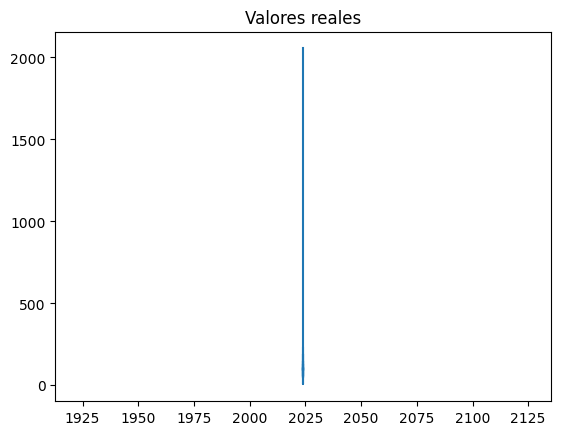

In [22]:
X_real = estadistica_real['AÑO'].values.reshape(-1, 1) 
Y_real = estadistica_real['TOTAL']
plt.title('Valores reales')
plt.plot(X_real,Y_real  )